Grades of Students dataset
Problem Statement:
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description    --  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

-

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

 

·       All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam



 

Predict   CGPA of a student based on different grades in four years.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


### 1. Identification of variables and data types

In [3]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

1. Seat number does not contribute to the output data
2. All input rows are in object dataype which needs to be coverted into int/float type using label encoder

In [4]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


### 2. Analyzing the basic metrics

In [5]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print('*****************')

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64
*****************
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
*****************
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
*****************
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
*****************
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64
*****************
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      

In [6]:
df.replace("I","F", inplace=True)
df.replace("W","WU",inplace=True)

### Encoding the categorical Data

In [7]:
l=["A+","A","A-","B+","B","B-","C+","C","C-","D+","D","D-","F","WU"]
r=14
for i in l:
    df.replace(f"{i}",r,inplace=True)
    r=r-1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    int64  
 2   HS-101     571 non-null    int64  
 3   CY-105     570 non-null    float64
 4   HS-105/12  570 non-null    float64
 5   MT-111     569 non-null    float64
 6   CS-105     571 non-null    int64  
 7   CS-106     569 non-null    float64
 8   EL-102     569 non-null    float64
 9   EE-119     569 non-null    float64
 10  ME-107     569 non-null    float64
 11  CS-107     569 non-null    float64
 12  HS-205/20  566 non-null    float64
 13  MT-222     566 non-null    float64
 14  EE-222     564 non-null    float64
 15  MT-224     564 non-null    float64
 16  CS-210     564 non-null    float64
 17  CS-211     566 non-null    float64
 18  CS-203     566 non-null    float64
 19  CS-214     565 non-null    float64
 20  EE-217    

### 2.Checking for missing values from dataframe

In [9]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [10]:
df.isnull().sum().sum()

425

In [11]:
for i in df.columns:
    df[f'{i}'] = df[f'{i}'].fillna(df[f'{i}'].mode()[0])

In [12]:
df.isnull().sum().sum()

0

In [13]:
# checking for empty spaces
df.isin(['NAN','NA','N/A','-',' ','?',np.nan]).sum().sum()

0

In [14]:
df.duplicated().sum()

0

### 3. Univariate Analysis

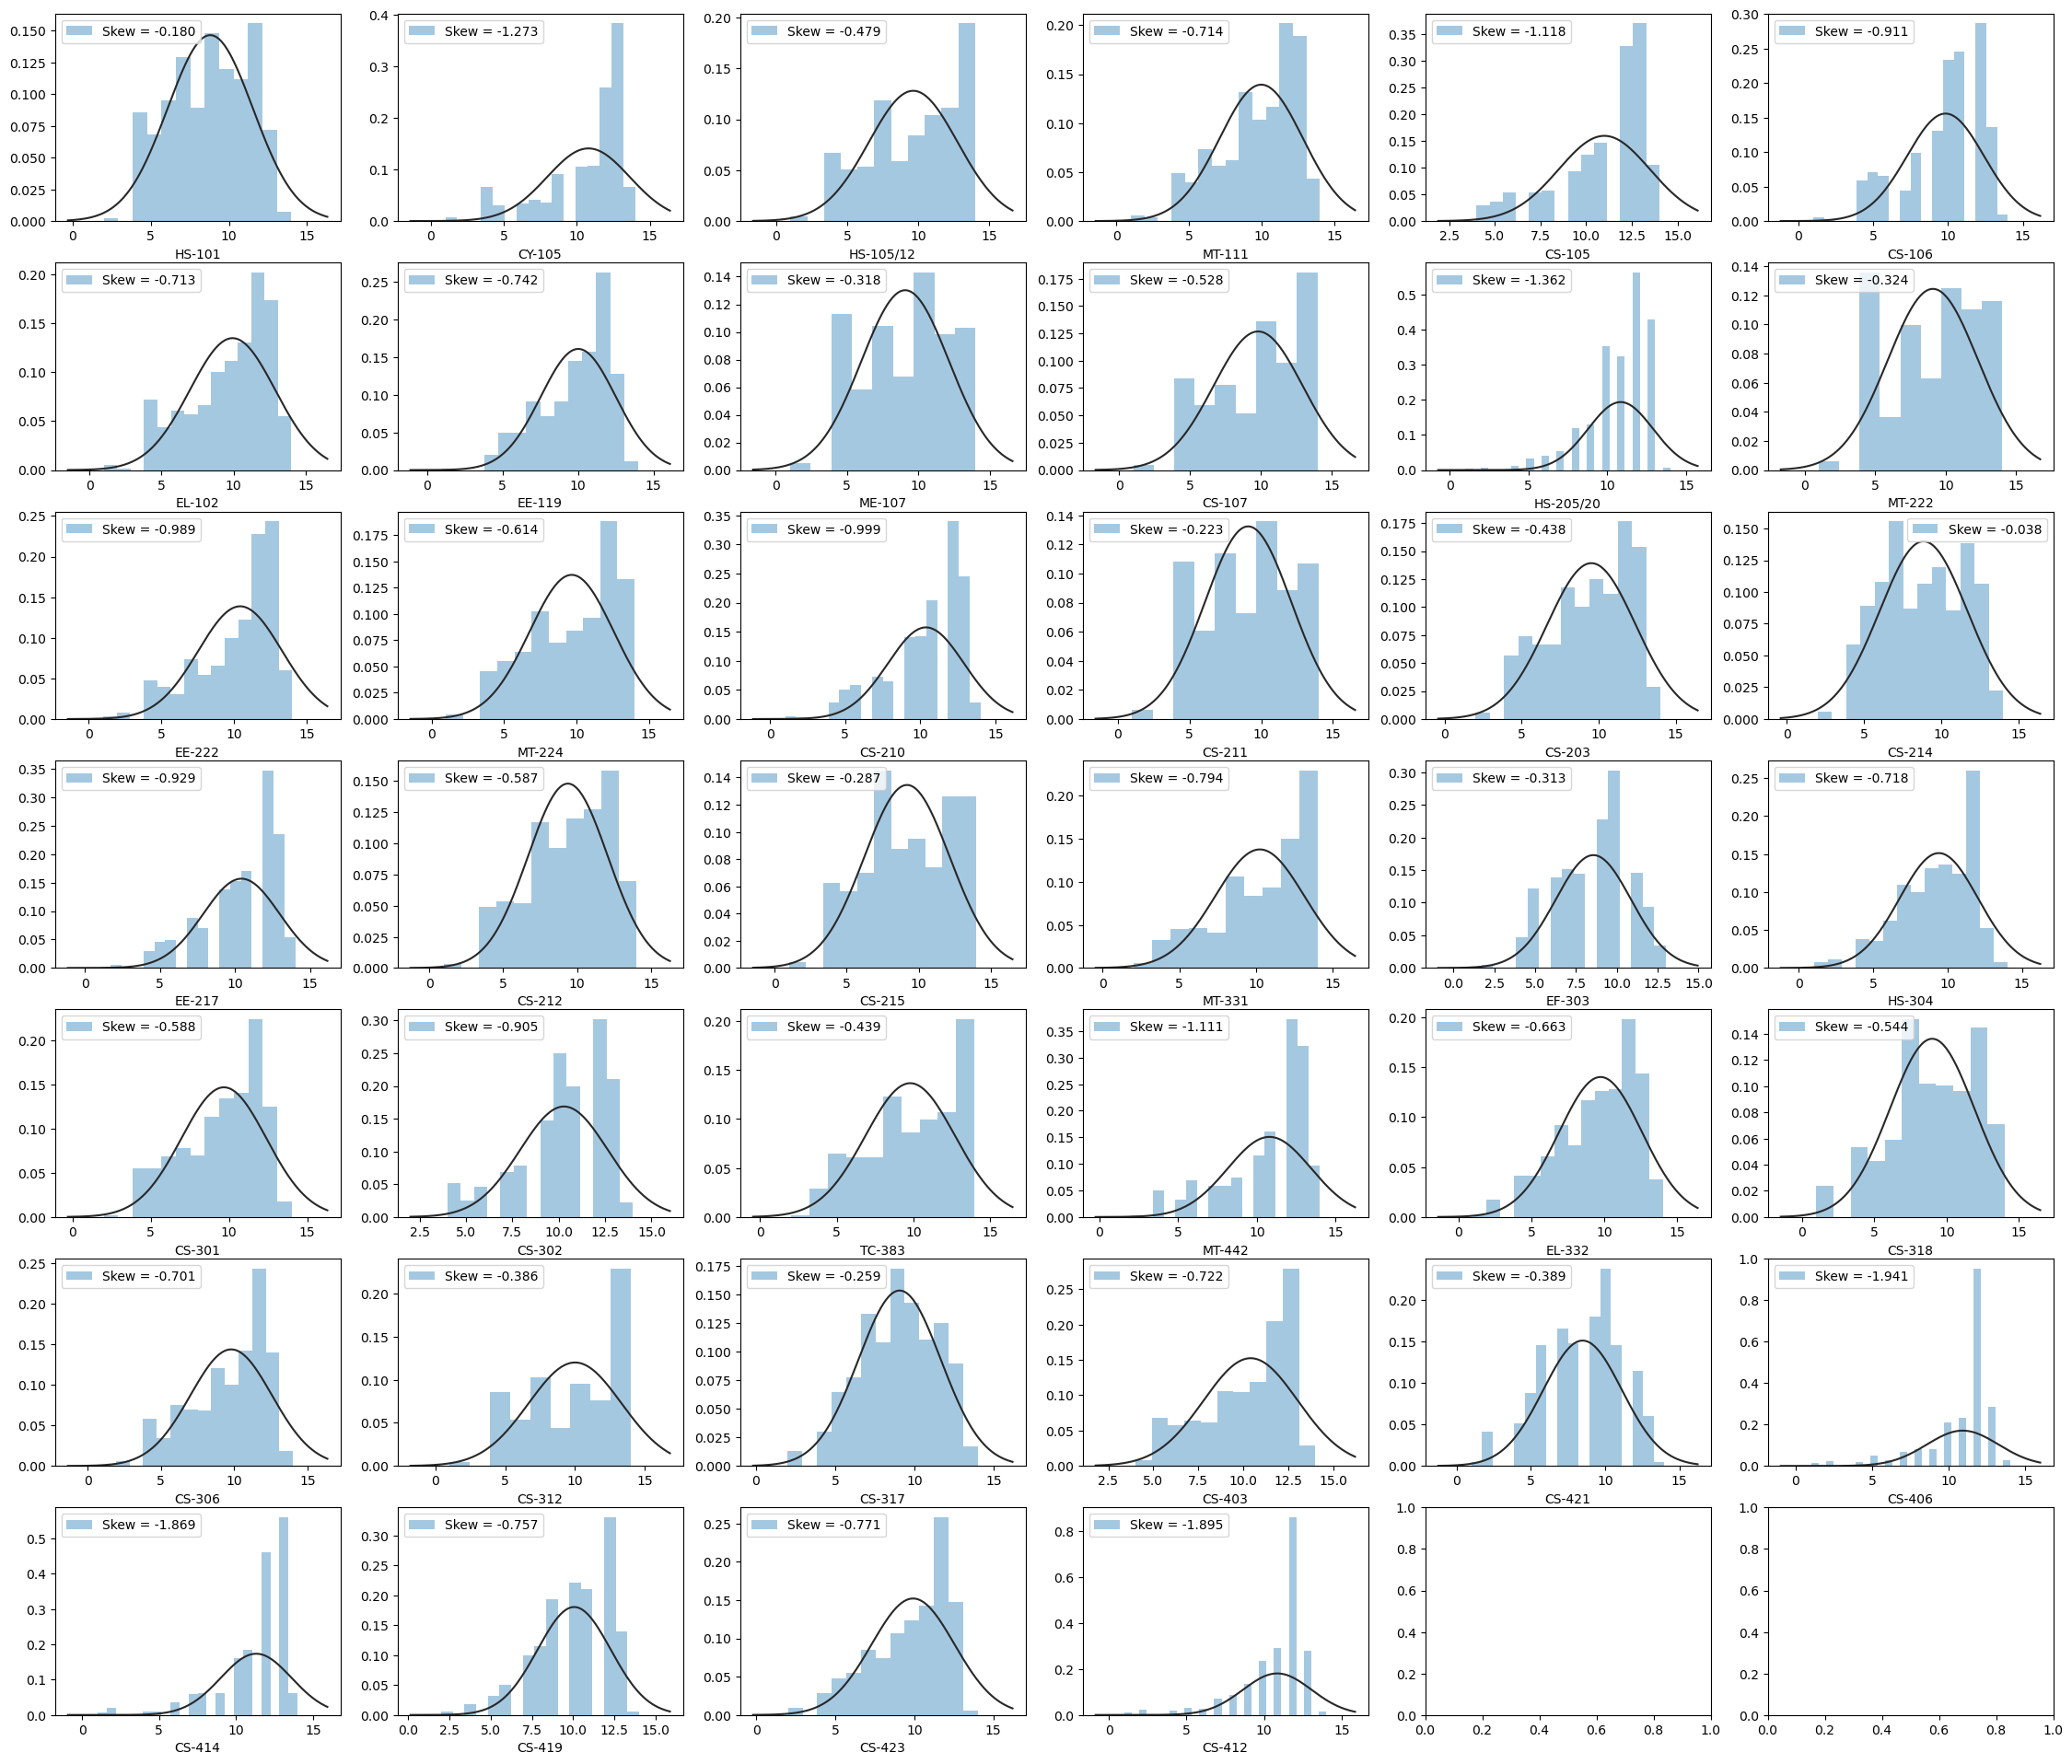

In [15]:
#plotting a histogram of each independent feature for visualization
cols = df.iloc[:,2:-1].columns
fig,ax = plt.subplots(7,6, figsize=(28, 24))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

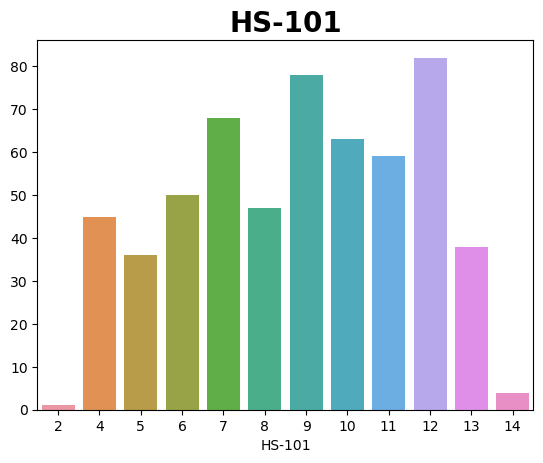

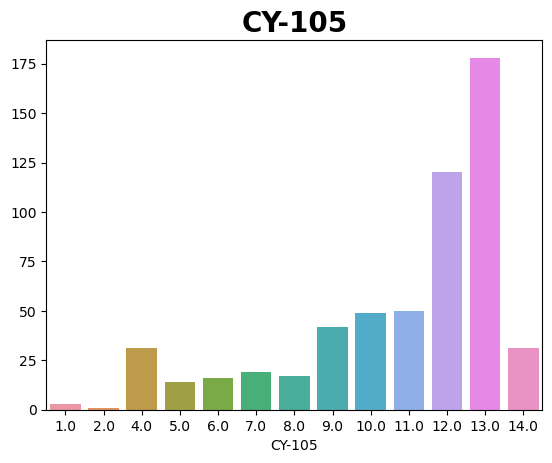

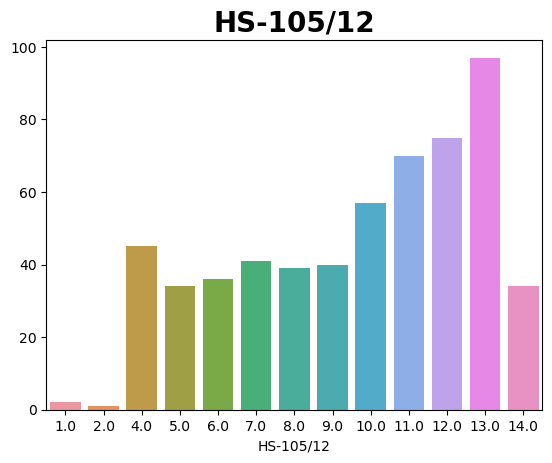

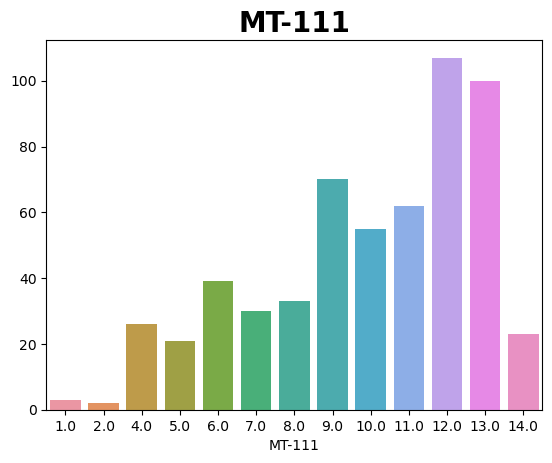

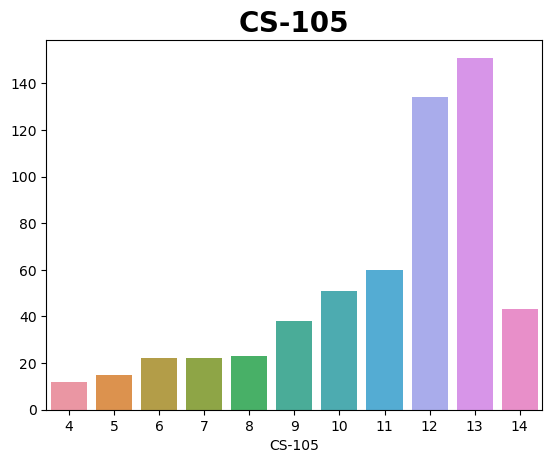

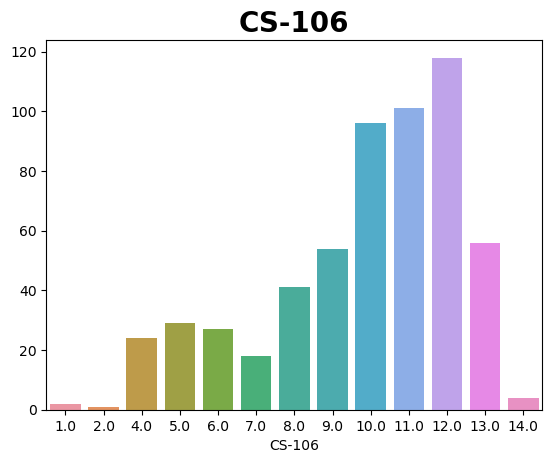

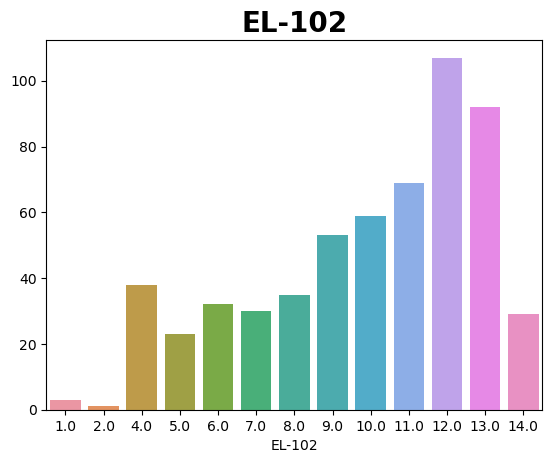

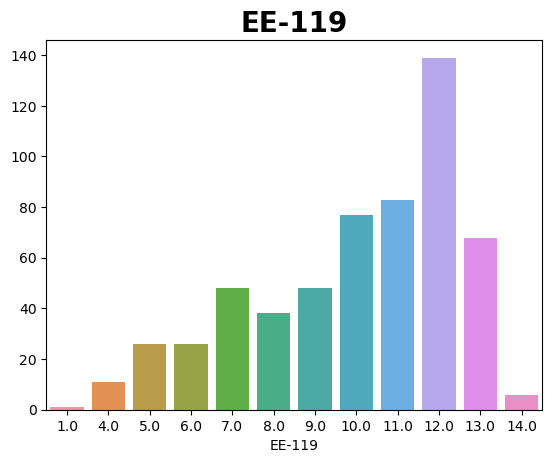

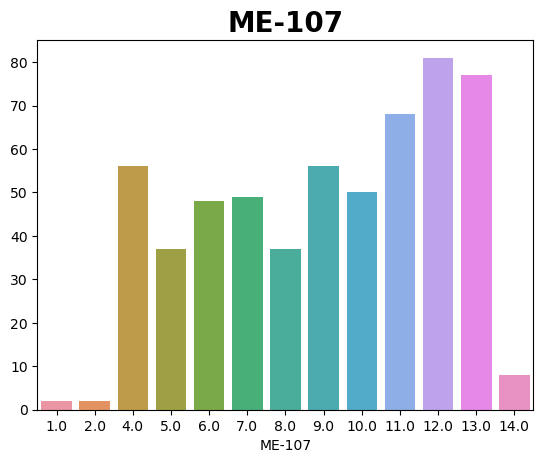

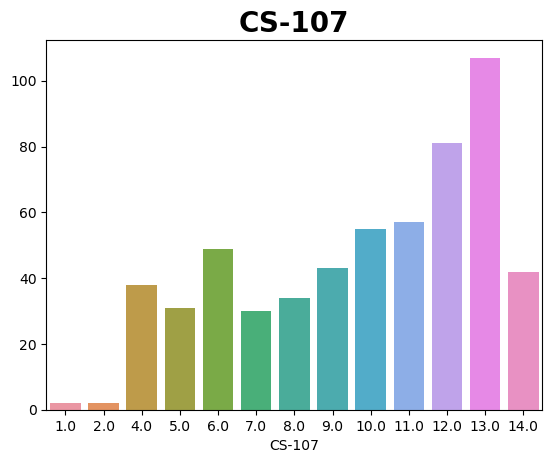

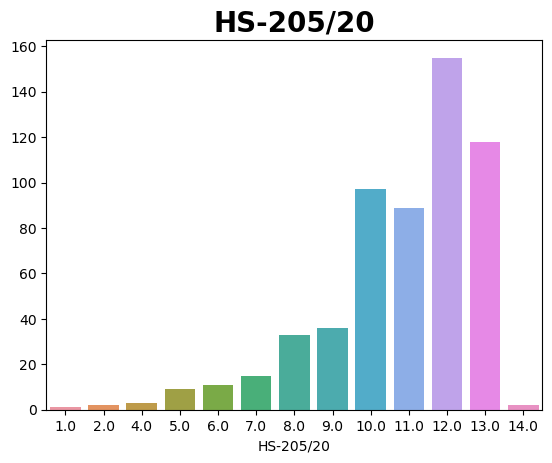

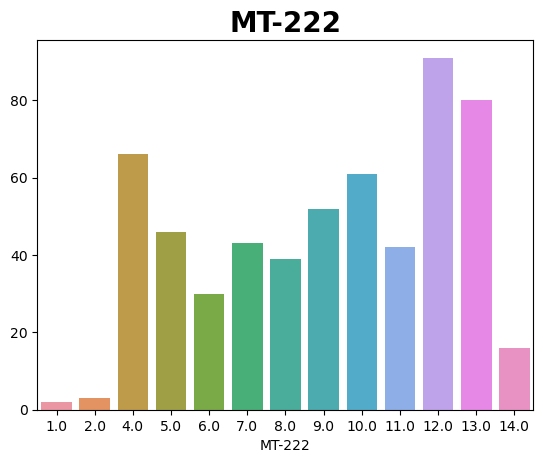

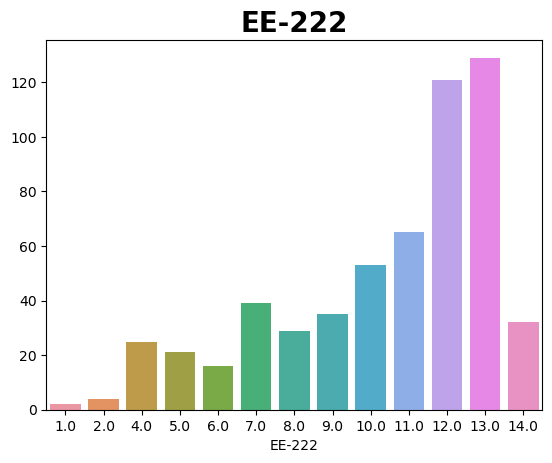

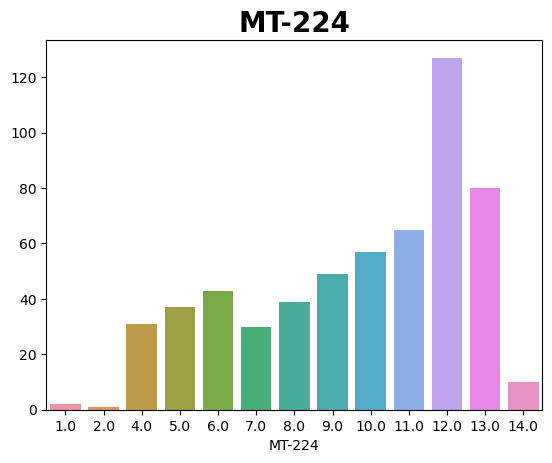

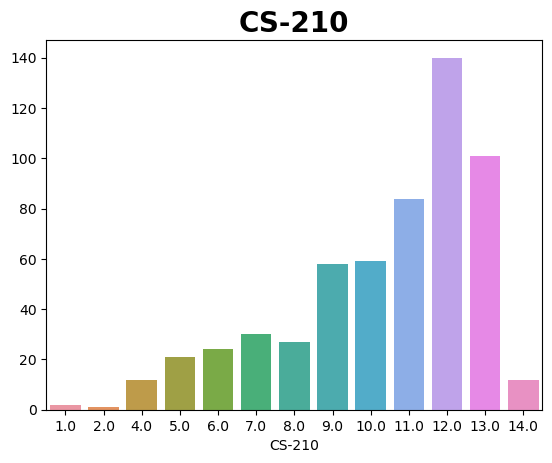

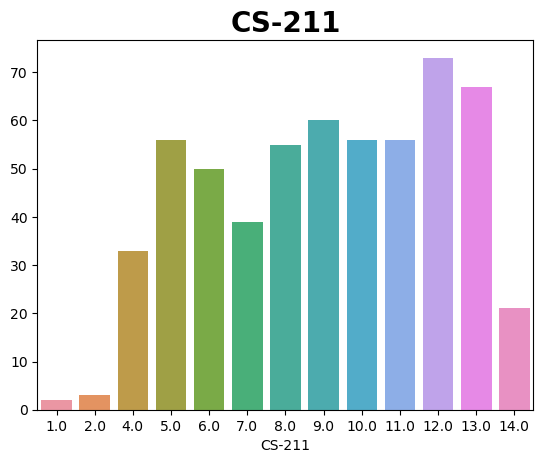

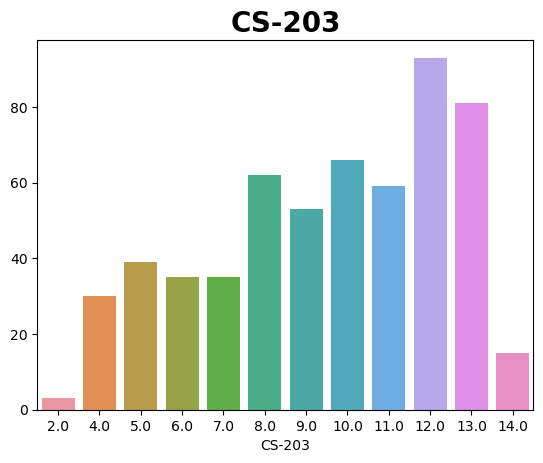

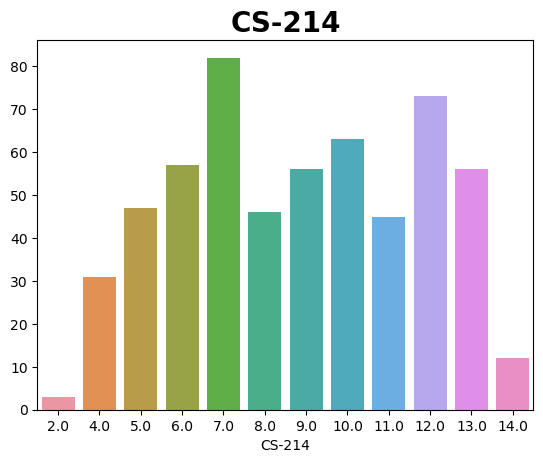

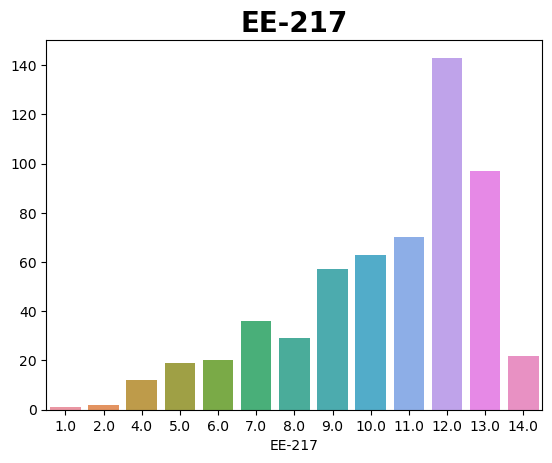

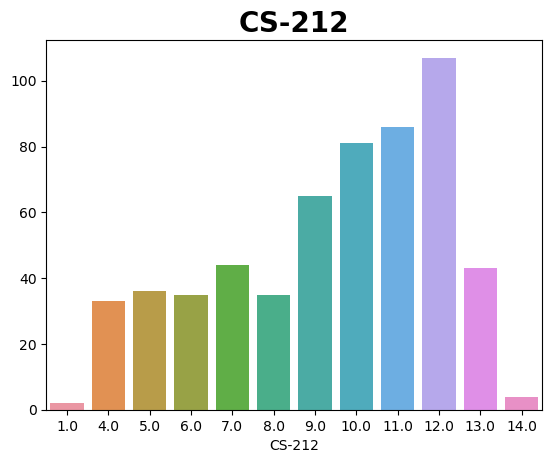

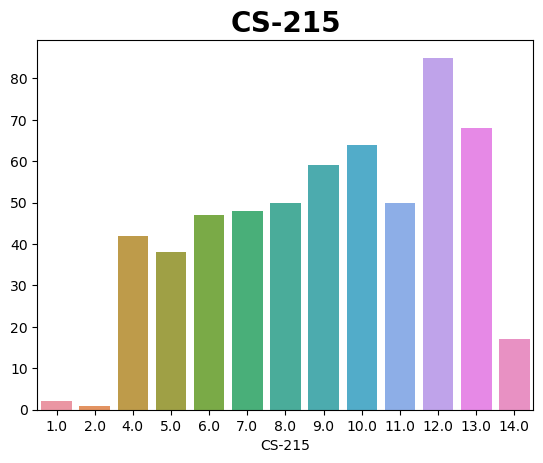

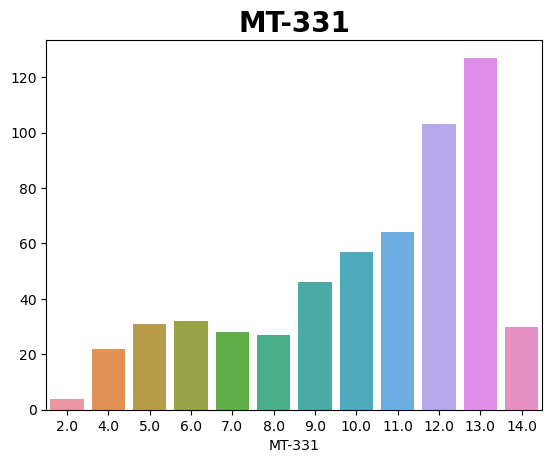

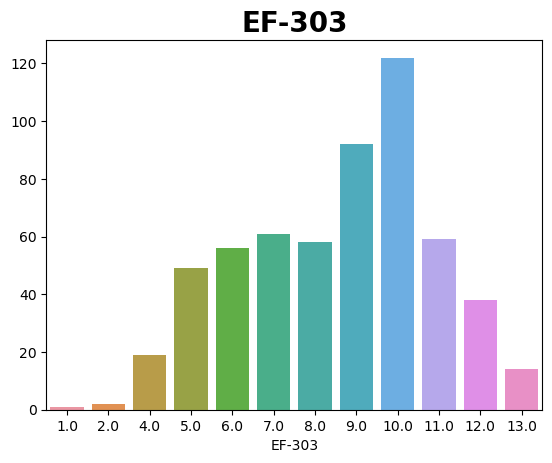

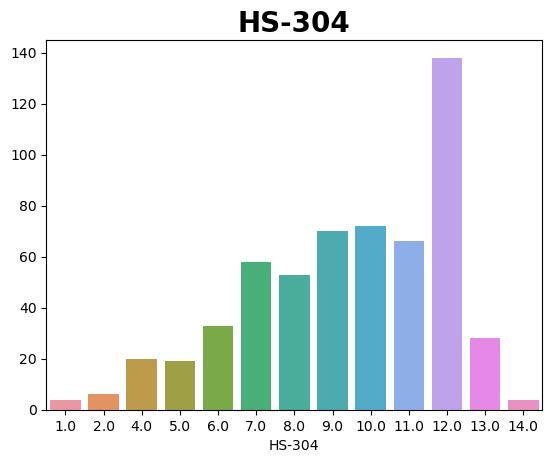

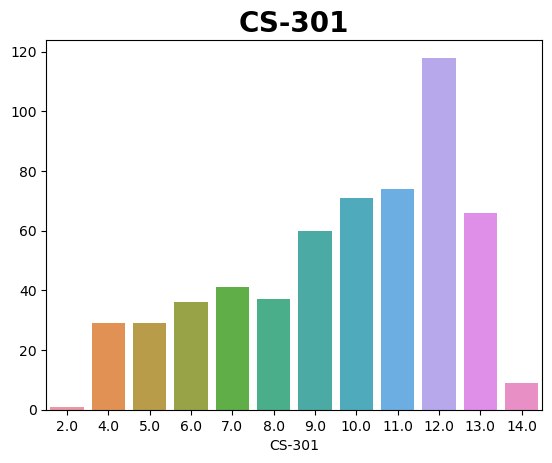

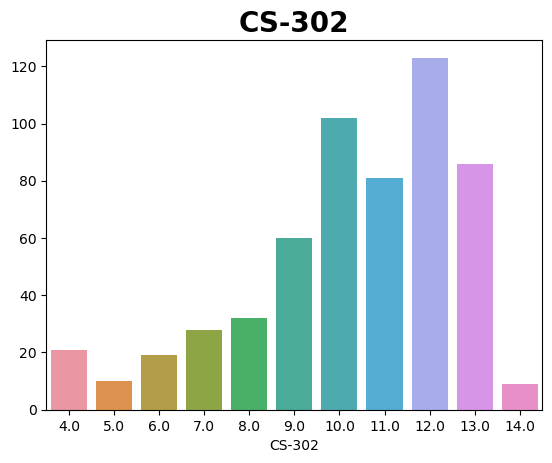

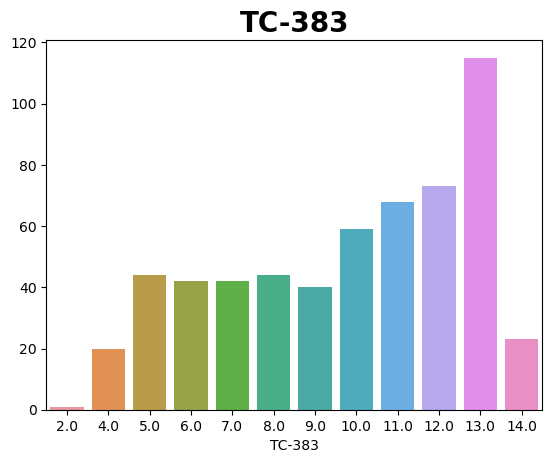

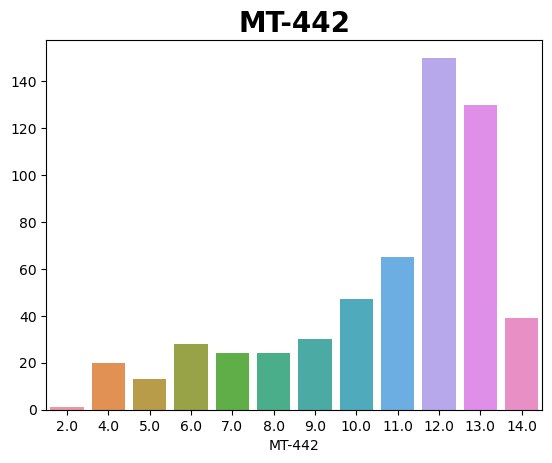

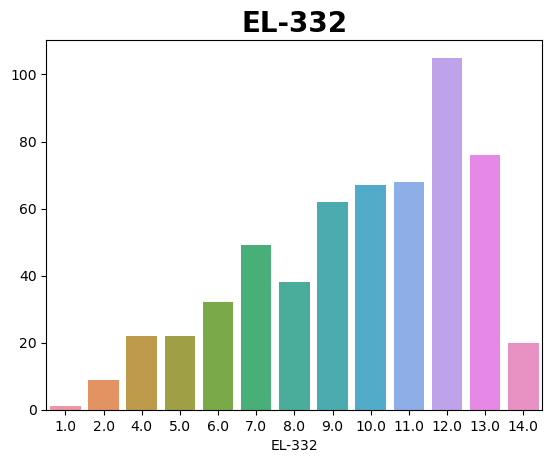

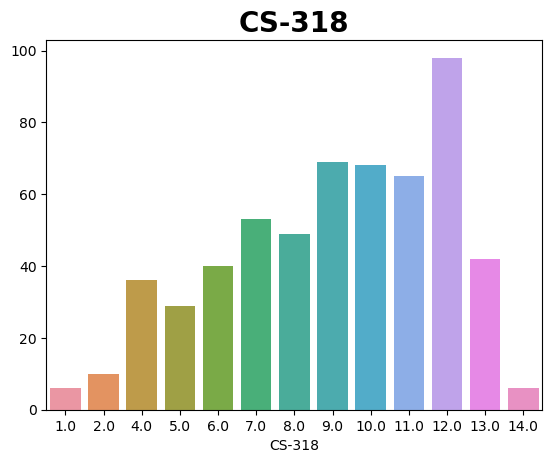

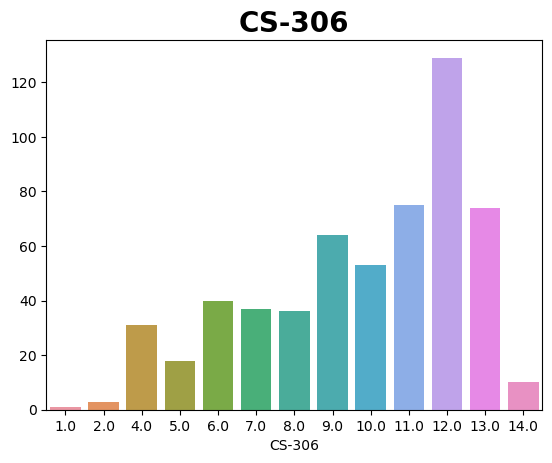

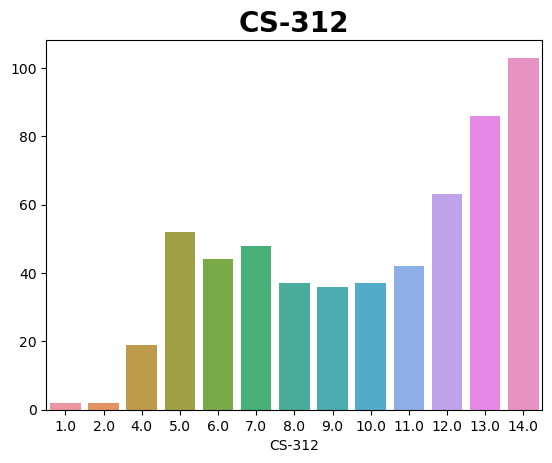

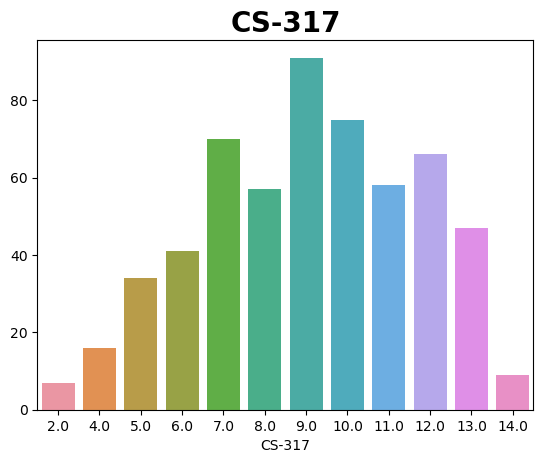

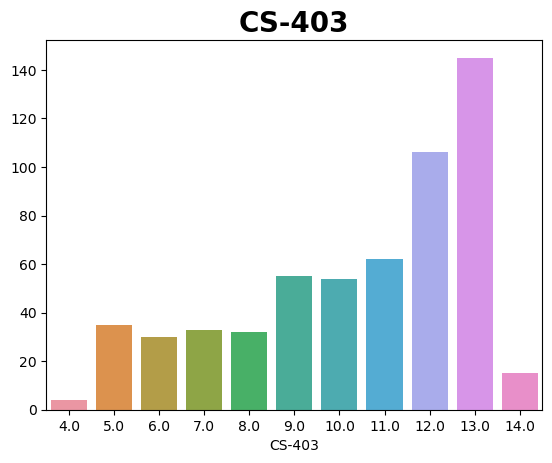

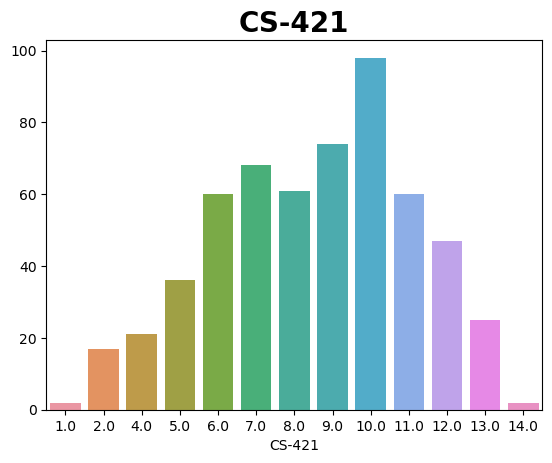

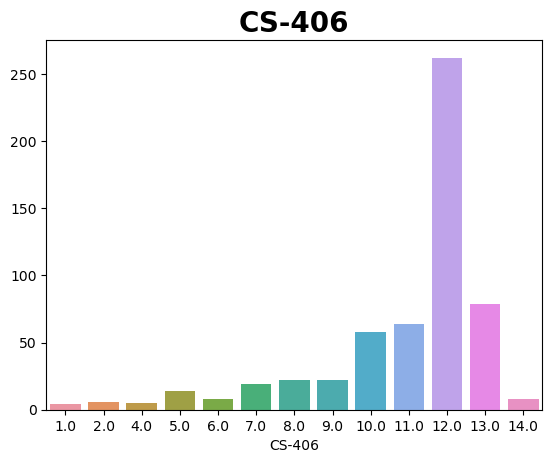

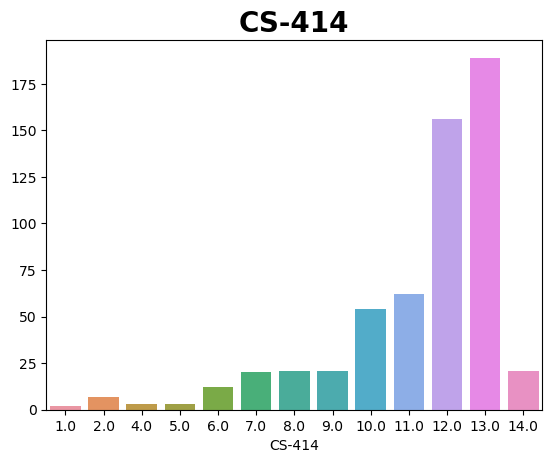

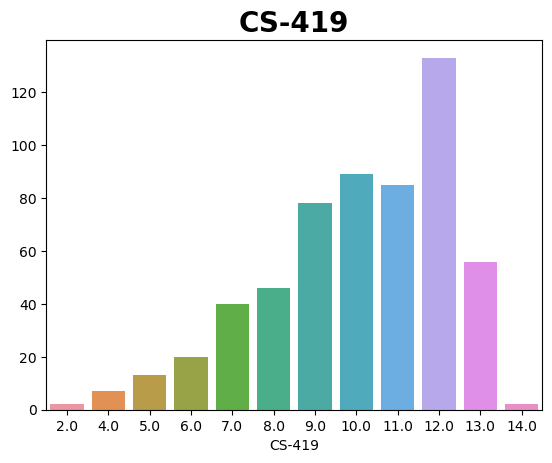

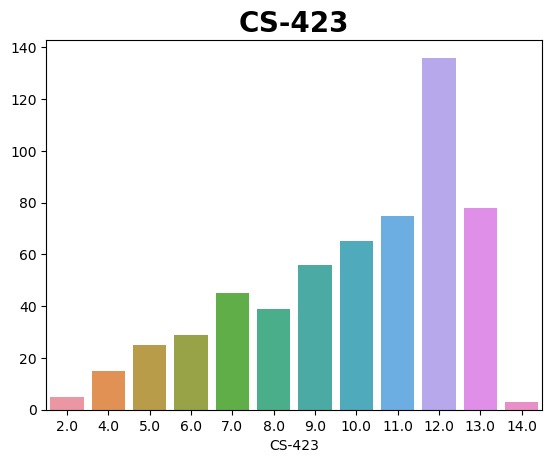

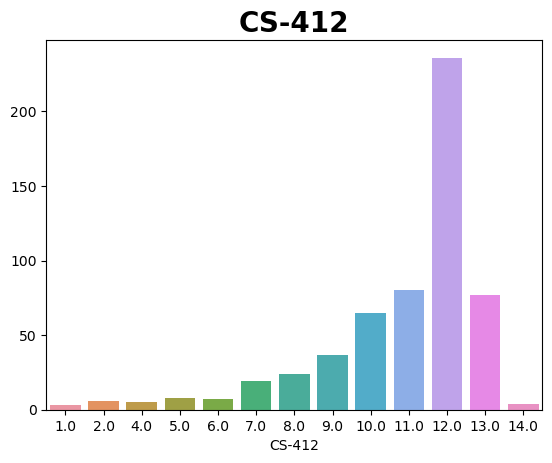

In [16]:
for i in df.columns[2:-1]:
    a=sns.countplot(data=df,x=i)
    a.set_title(i,fontsize=20,fontweight ='bold')
    a.set_ylabel("")
    plt.show()

## 4. Outlier treatment

Before the outlier treatment we must remove the columns with string values which have no significance in the output.

So we removed the column " Seat No."

In [17]:
df_n=df.drop("Seat No.",axis=1)

In [18]:
z=np.abs(zscore(df_n))
dfn=df_n[(z<3).all(axis=1)]
dfn

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,9,5,6.0,7.0,6.0,5,4.0,6.0,9.0,6.0,...,6.0,6.0,6.0,6.0,12.0,13.0,6.0,10.0,12.0,2.205
1,13,4,5.0,4.0,9.0,7,4.0,13.0,5.0,4.0,...,5.0,4.0,7.0,4.0,12.0,9.0,7.0,7.0,10.0,2.008
2,13,10,13.0,9.0,11.0,13,9.0,11.0,12.0,12.0,...,10.0,10.0,13.0,7.0,13.0,13.0,13.0,12.0,13.0,3.608
3,4,8,5.0,4.0,4.0,12,5.0,6.0,4.0,8.0,...,5.0,7.0,5.0,6.0,9.0,10.0,8.0,8.0,8.0,1.906
4,12,12,12.0,11.0,13.0,13,12.0,11.0,13.0,12.0,...,9.0,11.0,11.0,9.0,12.0,13.0,12.0,12.0,13.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,12,4,13.0,7.0,11.0,11,7.0,12.0,9.0,4.0,...,10.0,8.0,11.0,5.0,7.0,6.0,10.0,7.0,9.0,2.607
566,10,13,13.0,12.0,14.0,13,12.0,12.0,14.0,11.0,...,12.0,12.0,13.0,13.0,13.0,11.0,11.0,10.0,13.0,3.798
567,14,13,13.0,13.0,13.0,13,13.0,12.0,13.0,13.0,...,11.0,11.0,13.0,13.0,12.0,10.0,12.0,7.0,12.0,3.772
568,10,13,12.0,11.0,13.0,13,13.0,13.0,13.0,10.0,...,12.0,10.0,13.0,11.0,13.0,7.0,11.0,12.0,12.0,3.470


In [19]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,9,5,6.0,7.0,6.0,5,4.0,6.0,9.0,...,6.0,6.0,6.0,6.0,12.0,13.0,6.0,10.0,12.0,2.205
1,CS-97002,13,4,5.0,4.0,9.0,7,4.0,13.0,5.0,...,5.0,4.0,7.0,4.0,12.0,9.0,7.0,7.0,10.0,2.008
2,CS-97003,13,10,13.0,9.0,11.0,13,9.0,11.0,12.0,...,10.0,10.0,13.0,7.0,13.0,13.0,13.0,12.0,13.0,3.608
3,CS-97004,4,8,5.0,4.0,4.0,12,5.0,6.0,4.0,...,5.0,7.0,5.0,6.0,9.0,10.0,8.0,8.0,8.0,1.906
4,CS-97005,12,12,12.0,11.0,13.0,13,12.0,11.0,13.0,...,9.0,11.0,11.0,9.0,12.0,13.0,12.0,12.0,13.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,10,13,13.0,12.0,14.0,13,12.0,12.0,14.0,...,12.0,12.0,13.0,13.0,13.0,11.0,11.0,10.0,13.0,3.798
567,CS-97568,14,13,13.0,13.0,13.0,13,13.0,12.0,13.0,...,11.0,11.0,13.0,13.0,12.0,10.0,12.0,7.0,12.0,3.772
568,CS-97569,10,13,12.0,11.0,13.0,13,13.0,13.0,13.0,...,12.0,10.0,13.0,11.0,13.0,7.0,11.0,12.0,12.0,3.470
569,CS-97570,13,11,4.0,13.0,4.0,5,9.0,6.0,9.0,...,4.0,10.0,10.0,6.0,4.0,7.0,10.0,9.0,7.0,2.193


571-530=41, less than 10% data is lost while removing outliers which is under acceptable range.

## 5. . Variable transformations

In [20]:
#Checking skewness
dfn.skew()

PH-121      -0.843904
HS-101      -0.203421
CY-105      -1.265314
HS-105/12   -0.504669
MT-111      -0.666835
CS-105      -1.174753
CS-106      -0.892295
EL-102      -0.693315
EE-119      -0.756564
ME-107      -0.349246
CS-107      -0.586492
HS-205/20   -1.097112
MT-222      -0.346565
EE-222      -0.970369
MT-224      -0.633582
CS-210      -0.937554
CS-211      -0.183094
CS-203      -0.414410
CS-214      -0.062454
EE-217      -0.900570
CS-212      -0.576650
CS-215      -0.248224
MT-331      -0.783593
EF-303      -0.223459
HS-304      -0.494484
CS-301      -0.626409
CS-302      -0.916947
TC-383      -0.474538
MT-442      -1.127803
EL-332      -0.589493
CS-318      -0.469464
CS-306      -0.653470
CS-312      -0.370607
CS-317      -0.185477
CS-403      -0.690857
CS-421      -0.202962
CS-406      -1.606614
CS-414      -1.312368
CS-419      -0.661893
CS-423      -0.700539
CS-412      -1.235005
CGPA        -0.360068
dtype: float64

In [21]:
# removing skewness

for i in dfn.columns:   
    if abs(dfn[f"{i}"].skew())>=1:
        dfn[f"{i}"]=stats.boxcox(dfn[f"{i}"])[0]
        print(i,"--",dfn[f"{i}"].skew())

CY-105 -- -0.4619643477391139
CS-105 -- -0.34646910995497276
HS-205/20 -- -0.24526482600300428
MT-442 -- -0.3739777647540331
CS-406 -- -0.25128469114572743
CS-414 -- -0.25639781277071233
CS-412 -- -0.213640650023806


## 6. Correlation Analysis

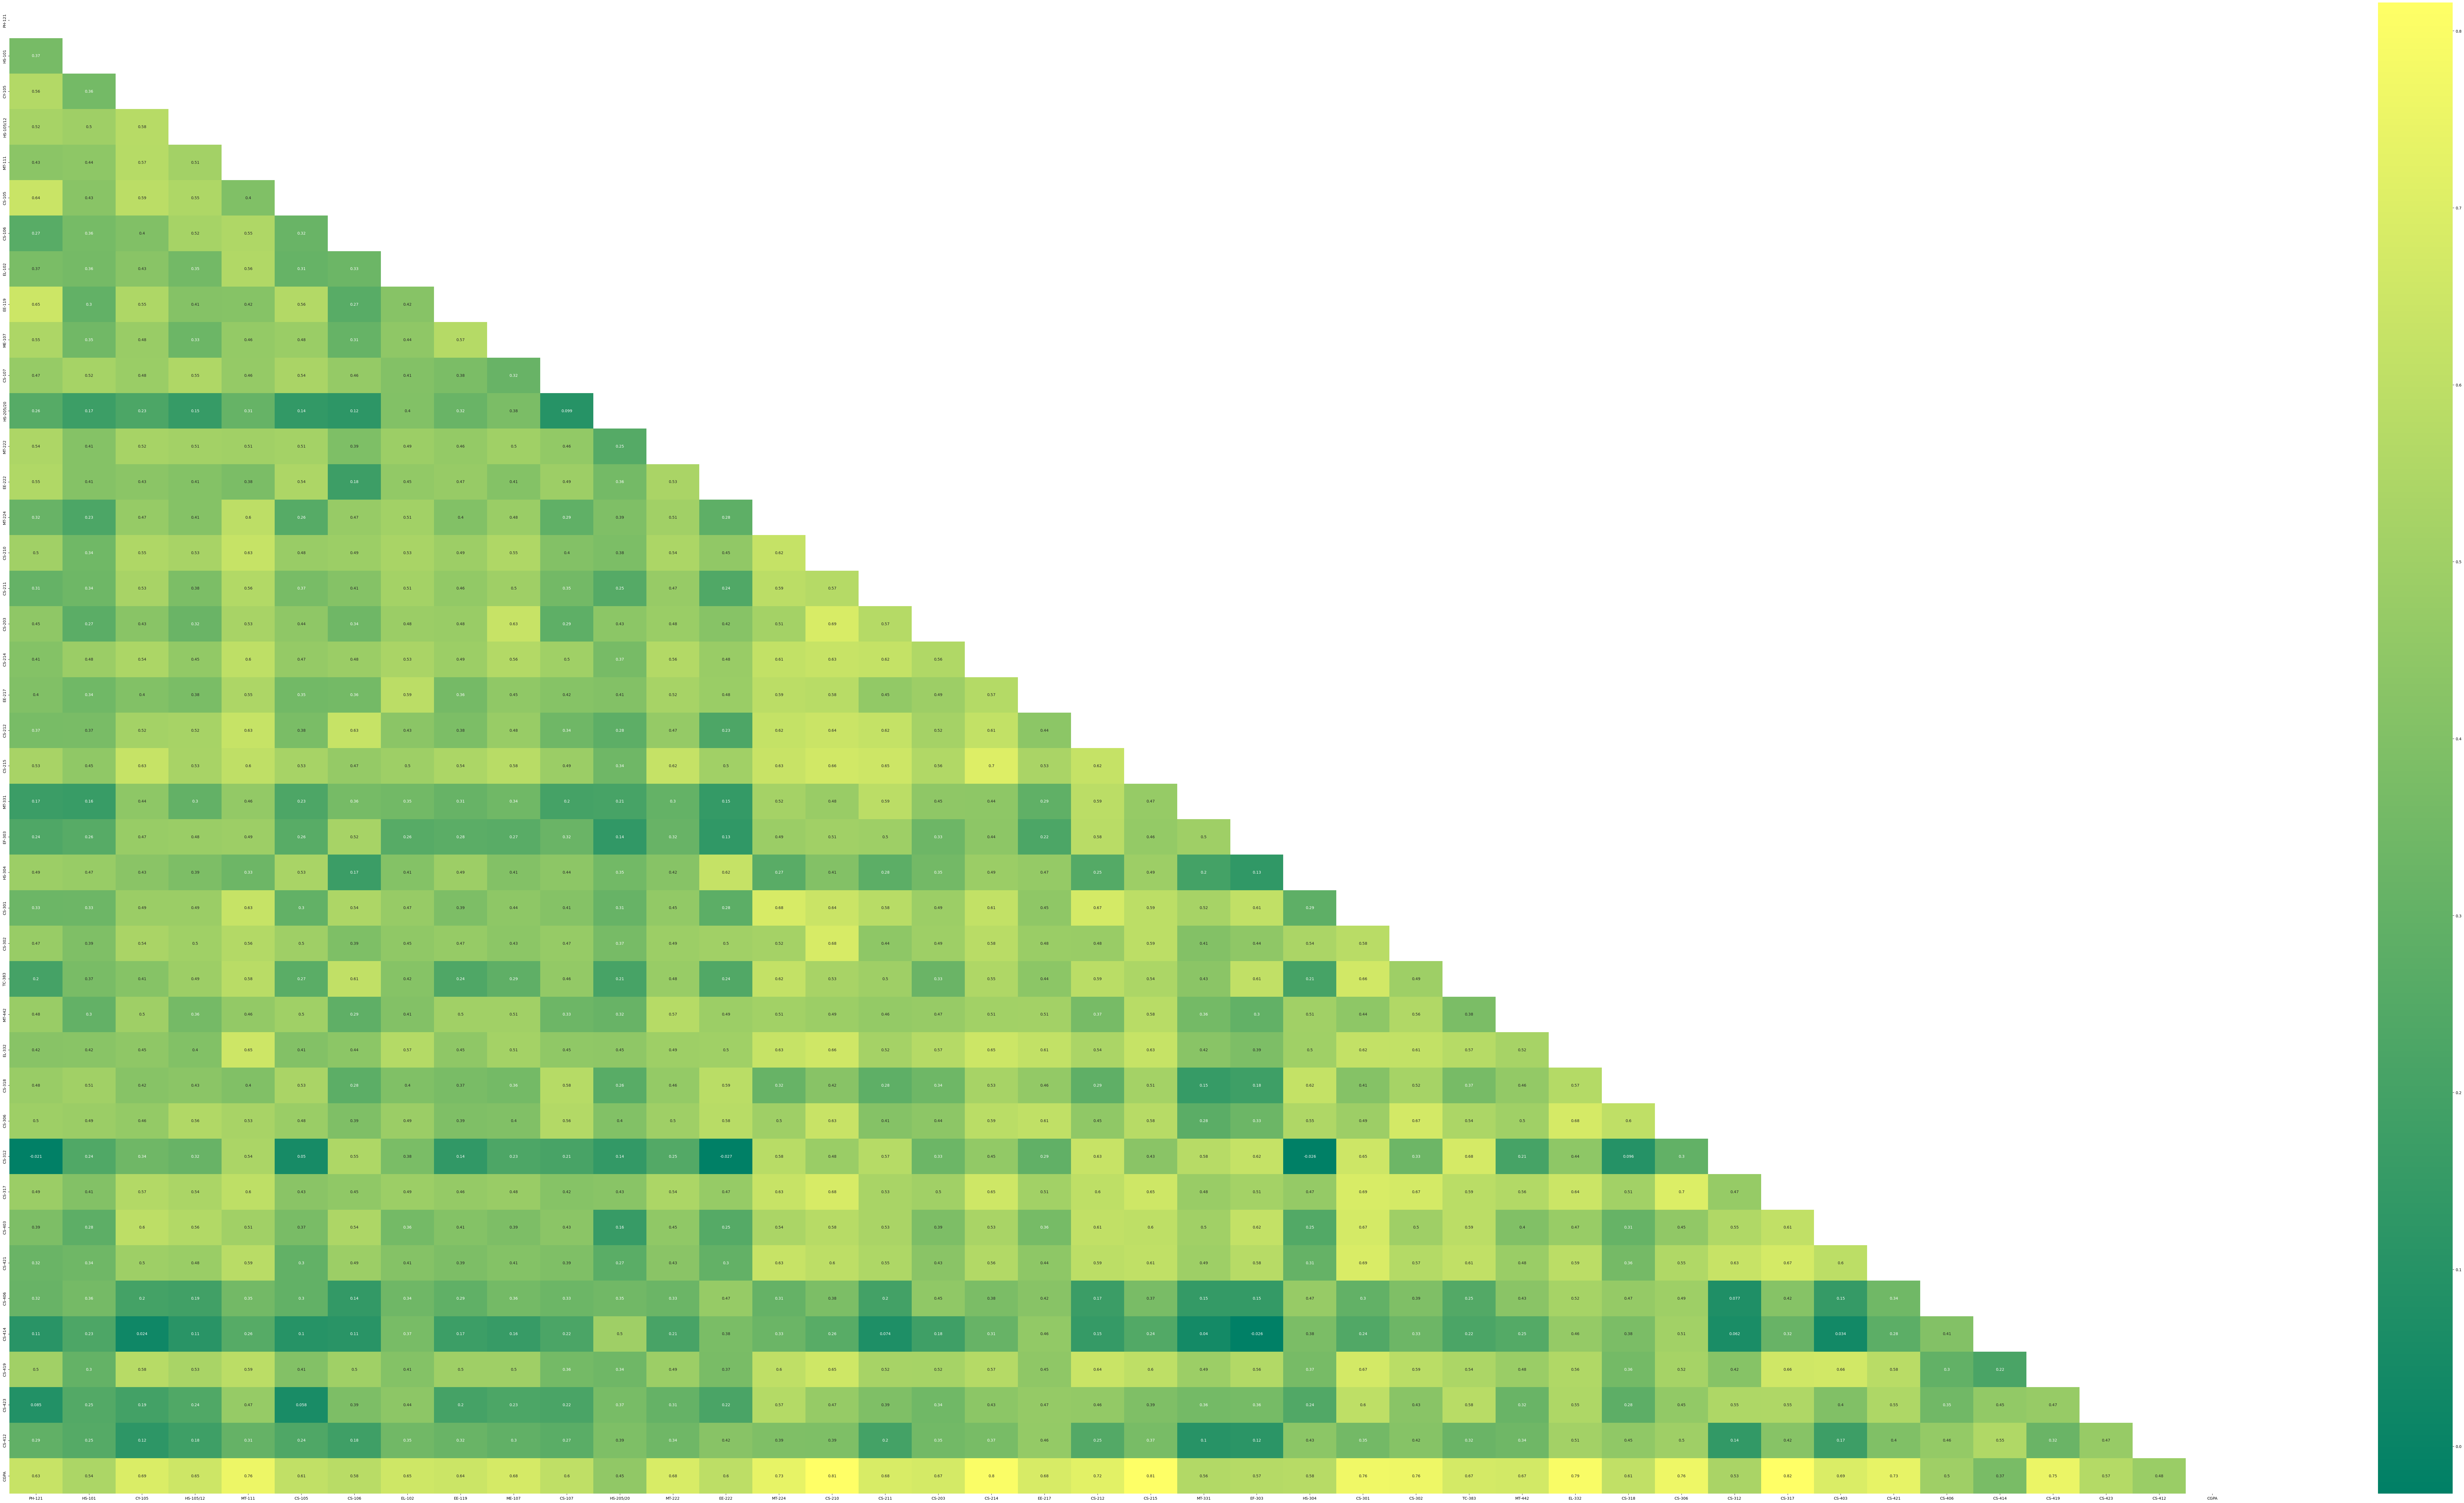

In [22]:
plt.figure(figsize = (130,70))
sns.heatmap(dfn.corr(), annot=True,cmap='summer',mask=np.triu(np.ones_like(dfn.corr())))
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(dfn.iloc[:,:-1].values,i) for i in range(dfn.iloc[:,:-1].shape[1])]
vif["features"]=dfn.iloc[:,:-1].columns
print(vif)

    VIF Factor   features
0    47.251182     PH-121
1    25.321175     HS-101
2    13.587640     CY-105
3    32.388065  HS-105/12
4    44.888491     MT-111
5    14.813470     CS-105
6    39.766383     CS-106
7    30.812347     EL-102
8    45.997594     EE-119
9    26.094159     ME-107
10   32.475769     CS-107
11   11.361331  HS-205/20
12   24.028172     MT-222
13   41.013039     EE-222
14   45.012485     MT-224
15   81.614020     CS-210
16   33.229499     CS-211
17   40.533788     CS-203
18   35.105333     CS-214
19   53.398703     EE-217
20   49.060891     CS-212
21   39.174236     CS-215
22   31.886931     MT-331
23   39.965961     EF-303
24   47.120385     HS-304
25   56.141453     CS-301
26   65.640441     CS-302
27   45.176070     TC-383
28   11.716167     MT-442
29   54.444331     EL-332
30   31.015259     CS-318
31   68.928223     CS-306
32   49.831424     CS-312
33   57.167075     CS-317
34   50.325737     CS-403
35   42.053007     CS-421
36   11.634880     CS-406
37   14.8294

Most of the columns are highly collinear. As we need to do prediction, we would not remove multicolinearity but use Lasso regression to reduce it.

## 7.No resampling needed as it is a regressor model

## 8. Scaling of Independent features

In [24]:
X=dfn.iloc[:,1:-1]
Y=dfn.iloc[:,-1]
st=StandardScaler()
x=st.fit_transform(X)
Xf=pd.DataFrame(data=x, columns=X.columns)

In [25]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(Xf,Y,test_size=0.2,random_state=15)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(424, 40) (424,)
(106, 40) (106,)


## 9. Training and testing of data

In [26]:
lr=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

In [27]:
model=[lr,svr,dtr,rfr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    print("==============================================\n\n\n====================================================")

Scores for LinearRegression() are
Mean Absolute Error: 0.05624147909988423
Mean Squared Error: 0.03803617854359172
Root Mean Squared Error: 0.1950286608260225
R squared score:  0.8884518101840658
Cross Validation Score is : [0.99519144 0.99402117 0.99124048 0.98730589 0.99532244]
Mean Score : 0.9926162832955339
Difference : 0.10416447311146804


Scores for SVR() are
Mean Absolute Error: 0.08135638259398922
Mean Squared Error: 0.036855347858603935
Root Mean Squared Error: 0.19197746705955868
R squared score:  0.8919148164700033
Cross Validation Score is : [0.97261337 0.98209702 0.97418413 0.97740621 0.98135287]
Mean Score : 0.97753072078361
Difference : 0.08561590431360677


Scores for DecisionTreeRegressor() are
Mean Absolute Error: 0.18605660377358488
Mean Squared Error: 0.09236588679245282
Root Mean Squared Error: 0.3039175657846266
R squared score:  0.7291198046976912
Cross Validation Score is : [0.8282484  0.81844764 0.77059714 0.83938021 0.81725944]
Mean Score : 0.8147865669719178

#### Best score is given by Linear Regression, so we saved this model and used for prediction

## 10. Saving/Loading the model

In [28]:
import joblib
joblib.dump(lr,"grades_lr.obj")

['grades_lr.obj']

In [29]:
lr_l=joblib.load('grades_lr.obj')

In [30]:
p=lr_l.predict(test_x)

In [31]:
score=cross_val_score(lr_l,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)

Cross Validation Score is : [0.99519144 0.99402117 0.99124048 0.98730589 0.99532244]
